In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
corn = pd.read_csv("Corn-NY-All.csv")
corn.head()


,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,County ANSI,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,CENSUS,2017,YEAR,NaN,COUNTY,NEW YORK,36,CENTRAL,50,CAYUGA,11.0,NaN,NaN,0,NaN,CORN,CORN - OPERATIONS WITH SALES,TOTAL,NOT SPECIFIED,260,24.2
1,CENSUS,2017,YEAR,NaN,COUNTY,NEW YORK,36,CENTRAL,50,CAYUGA,11.0,NaN,NaN,0,NaN,CORN,"CORN - SALES, MEASURED IN $",TOTAL,NOT SPECIFIED,"23,218,000",11.7
2,CENSUS,2017,YEAR,NaN,COUNTY,NEW YORK,36,CENTRAL,50,CAYUGA,11.0,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"27,223",12.4
3,CENSUS,2017,YEAR,NaN,COUNTY,NEW YORK,36,CENTRAL,50,CAYUGA,11.0,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - OPERATIONS WITH AREA HARVESTED",AREA HARVESTED,"AREA HARVESTED: (1,000 OR MORE ACRES)",3,9.2
4,CENSUS,2017,YEAR,NaN,COUNTY,NEW YORK,36,CENTRAL,50,CAYUGA,11.0,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - OPERATIONS WITH AREA HARVESTED",AREA HARVESTED,AREA HARVESTED: (1.0 TO 24.9 ACRES),63,43.9


Data Cleaning

In [6]:
#drop period, geo level, state, state ansi, week ending, zip code, region, commodity???, watershed_code, watershed bc everything is year
corn.drop(columns =["Period", "Week Ending", "Geo Level","State", "State ANSI", "Zip Code","Region",  "watershed_code", "Watershed"], axis=1, inplace=True)
corn.head()

,Program,Year,Ag District,Ag District Code,County,County ANSI,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,CENSUS,2017,CENTRAL,50,CAYUGA,11.0,CORN,CORN - OPERATIONS WITH SALES,TOTAL,NOT SPECIFIED,260,24.2
1,CENSUS,2017,CENTRAL,50,CAYUGA,11.0,CORN,"CORN - SALES, MEASURED IN $",TOTAL,NOT SPECIFIED,"23,218,000",11.7
2,CENSUS,2017,CENTRAL,50,CAYUGA,11.0,CORN,"CORN, GRAIN - ACRES HARVESTED",TOTAL,NOT SPECIFIED,"27,223",12.4
3,CENSUS,2017,CENTRAL,50,CAYUGA,11.0,CORN,"CORN, GRAIN - OPERATIONS WITH AREA HARVESTED",AREA HARVESTED,"AREA HARVESTED: (1,000 OR MORE ACRES)",3,9.2
4,CENSUS,2017,CENTRAL,50,CAYUGA,11.0,CORN,"CORN, GRAIN - OPERATIONS WITH AREA HARVESTED",AREA HARVESTED,AREA HARVESTED: (1.0 TO 24.9 ACRES),63,43.9


In [7]:
corn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21706 entries, 0 to 21705
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Program           21706 non-null  object 
 1   Year              21706 non-null  int64  
 2   Ag District       21706 non-null  object 
 3   Ag District Code  21706 non-null  int64  
 4   County            21706 non-null  object 
 5   County ANSI       21081 non-null  float64
 6   Commodity         21706 non-null  object 
 7   Data Item         21706 non-null  object 
 8   Domain            21706 non-null  object 
 9   Domain Category   21706 non-null  object 
 10  Value             21706 non-null  object 
 11  CV (%)            2045 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.0+ MB


Things to Note:

1) There are D values, in both Value and CV % - Published data value or suppression reason code. There was no specific pattern oberved for the D value, for now we will drop them since it is 203 observations

2) there are many CV missing values, this is not a column of interest, we chose value to aid the analysis

3) Coefficient of variation. Available for the 2012 Census of Agriculture only. County-level CVs are generalized.

In [8]:
corn.nunique()

Program                2
Year                  48
Ag District            9
Ag District Code       9
County                58
County ANSI           57
Commodity              1
Data Item             22
Domain                 2
Domain Category        8
Value               5610
CV (%)                43
dtype: int64

In [9]:
corn["Data Item"].unique()

array(['CORN - OPERATIONS WITH SALES', 'CORN - SALES, MEASURED IN $',
       'CORN, GRAIN - ACRES HARVESTED',
       'CORN, GRAIN - OPERATIONS WITH AREA HARVESTED',
       'CORN, GRAIN - PRODUCTION, MEASURED IN BU',
       'CORN, GRAIN, IRRIGATED - ACRES HARVESTED',
       'CORN, GRAIN, IRRIGATED - OPERATIONS WITH AREA HARVESTED',
       'CORN, SILAGE - ACRES HARVESTED',
       'CORN, SILAGE - OPERATIONS WITH AREA HARVESTED',
       'CORN, SILAGE - PRODUCTION, MEASURED IN TONS',
       'CORN, SILAGE, IRRIGATED - ACRES HARVESTED',
       'CORN, SILAGE, IRRIGATED - OPERATIONS WITH AREA HARVESTED',
       'CORN, TRADITIONAL OR INDIAN - ACRES HARVESTED',
       'CORN, TRADITIONAL OR INDIAN - OPERATIONS WITH AREA HARVESTED',
       'CORN, TRADITIONAL OR INDIAN - PRODUCTION, MEASURED IN LB',
       'CORN, TRADITIONAL OR INDIAN, IRRIGATED - ACRES HARVESTED',
       'CORN, TRADITIONAL OR INDIAN, IRRIGATED - OPERATIONS WITH AREA HARVESTED',
       'CORN - ACRES PLANTED',
       'CORN, GRAIN - Y

In [10]:
#casting data types
corn = corn.drop(corn[corn.Value == " (D)"].index)

corn.replace(',','', regex=True, inplace=True)

corn['Value'] = corn['Value'].astype('float64')
corn['Program'] = corn['Program'].astype('category')
corn['Ag District'] = corn['Ag District'].astype('category')

corn['County'] = corn['County'].astype('category')
corn['Commodity'] = corn['Commodity'].astype('string')
corn['Data Item'] = corn['Data Item'].astype('category')
corn['Domain'] = corn['Domain'].astype('category')
corn['Domain Category'] = corn['Domain Category'].astype('category')

In [11]:
#check to see that everything casted properly into the correct data type
corn.isnull().sum()
corn.head()
corn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21463 entries, 0 to 21705
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Program           21463 non-null  category
 1   Year              21463 non-null  int64   
 2   Ag District       21463 non-null  category
 3   Ag District Code  21463 non-null  int64   
 4   County            21463 non-null  category
 5   County ANSI       20838 non-null  float64 
 6   Commodity         21463 non-null  string  
 7   Data Item         21463 non-null  category
 8   Domain            21463 non-null  category
 9   Domain Category   21463 non-null  category
 10  Value             21463 non-null  float64 
 11  CV (%)            1946 non-null   object  
dtypes: category(6), float64(2), int64(2), object(1), string(1)
memory usage: 1.3+ MB


In [13]:
yield_corn=corn.copy()
yield_corn.head()
yield_corn.groupby("Data Item").count()

,Program,Year,Ag District,Ag District Code,County,County ANSI,Commodity,Domain,Domain Category,Value,CV (%)
Data Item,,,,,,,,,,,
CORN - ACRES PLANTED,2372,2372,2372,2372,2372,2283,2372,2372,2372,2372,0
CORN - OPERATIONS WITH SALES,163,163,163,163,163,163,163,163,163,163,109
CORN - SALES MEASURED IN $,147,147,147,147,147,147,147,147,147,147,99
CORN GRAIN - ACRES HARVESTED,2590,2590,2590,2590,2590,2503,2590,2590,2590,2590,102
CORN GRAIN - ACRES PLANTED NET,571,571,571,571,571,563,571,571,571,571,0
CORN GRAIN - OPERATIONS WITH AREA HARVESTED,1316,1316,1316,1316,1316,1316,1316,1316,1316,1316,626
CORN GRAIN - PRODUCTION MEASURED IN BU,2588,2588,2588,2588,2588,2501,2588,2588,2588,2588,100
CORN GRAIN - YIELD MEASURED IN BU / ACRE,2344,2344,2344,2344,2344,2256,2344,2344,2344,2344,0
CORN GRAIN - YIELD MEASURED IN BU / NET PLANTED ACRE,519,519,519,519,519,511,519,519,519,519,0


In [14]:
yield_corn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21463 entries, 0 to 21705
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Program           21463 non-null  category
 1   Year              21463 non-null  int64   
 2   Ag District       21463 non-null  category
 3   Ag District Code  21463 non-null  int64   
 4   County            21463 non-null  category
 5   County ANSI       20838 non-null  float64 
 6   Commodity         21463 non-null  string  
 7   Data Item         21463 non-null  category
 8   Domain            21463 non-null  category
 9   Domain Category   21463 non-null  category
 10  Value             21463 non-null  float64 
 11  CV (%)            1946 non-null   object  
dtypes: category(6), float64(2), int64(2), object(1), string(1)
memory usage: 1.3+ MB


In [18]:
yield_corn_df = yield_corn[yield_corn["Data Item"]=="CORN GRAIN - YIELD MEASURED IN BU / ACRE"]
print(yield_corn_df.shape)
yield_corn_df.info()          
yield_corn_df.head(10)

(2344, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2344 entries, 4429 to 21705
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Program           2344 non-null   category
 1   Year              2344 non-null   int64   
 2   Ag District       2344 non-null   category
 3   Ag District Code  2344 non-null   int64   
 4   County            2344 non-null   category
 5   County ANSI       2256 non-null   float64 
 6   Commodity         2344 non-null   string  
 7   Data Item         2344 non-null   category
 8   Domain            2344 non-null   category
 9   Domain Category   2344 non-null   category
 10  Value             2344 non-null   float64 
 11  CV (%)            0 non-null      object  
dtypes: category(6), float64(2), int64(2), object(1), string(1)
memory usage: 146.6+ KB


,Program,Year,Ag District,Ag District Code,County,County ANSI,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
4429,SURVEY,2019,CENTRAL,50,CAYUGA,11.0,CORN,CORN GRAIN - YIELD MEASURED IN BU / ACRE,TOTAL,NOT SPECIFIED,158.0,NaN
4436,SURVEY,2019,CENTRAL,50,CORTLAND,23.0,CORN,CORN GRAIN - YIELD MEASURED IN BU / ACRE,TOTAL,NOT SPECIFIED,157.6,NaN
4443,SURVEY,2019,CENTRAL,50,HERKIMER,43.0,CORN,CORN GRAIN - YIELD MEASURED IN BU / ACRE,TOTAL,NOT SPECIFIED,147.9,NaN
4447,SURVEY,2019,CENTRAL,50,MADISON,53.0,CORN,CORN GRAIN - YIELD MEASURED IN BU / ACRE,TOTAL,NOT SPECIFIED,139.3,NaN
4454,SURVEY,2019,CENTRAL,50,ONEIDA,65.0,CORN,CORN GRAIN - YIELD MEASURED IN BU / ACRE,TOTAL,NOT SPECIFIED,154.4,NaN
4461,SURVEY,2019,CENTRAL,50,ONONDAGA,67.0,CORN,CORN GRAIN - YIELD MEASURED IN BU / ACRE,TOTAL,NOT SPECIFIED,157.5,NaN
4468,SURVEY,2019,CENTRAL,50,OTHER (COMBINED) COUNTIES,NaN,CORN,CORN GRAIN - YIELD MEASURED IN BU / ACRE,TOTAL,NOT SPECIFIED,122.7,NaN
4475,SURVEY,2019,CENTRAL,50,OTSEGO,77.0,CORN,CORN GRAIN - YIELD MEASURED IN BU / ACRE,TOTAL,NOT SPECIFIED,126.8,NaN
4488,SURVEY,2019,EASTERN,60,OTHER (COMBINED) COUNTIES,NaN,CORN,CORN GRAIN - YIELD MEASURED IN BU / ACRE,TOTAL,NOT SPECIFIED,170.1,NaN
4495,SURVEY,2019,EASTERN,60,RENSSELAER,83.0,CORN,CORN GRAIN - YIELD MEASURED IN BU / ACRE,TOTAL,NOT SPECIFIED,165.2,NaN


In [19]:
yield_corn_df.nunique()

Program               1
Year                 48
Ag District           9
Ag District Code      9
County               54
County ANSI          53
Commodity             1
Data Item             1
Domain                1
Domain Category       1
Value               472
CV (%)                0
dtype: int64

In [20]:
acresplanted_corn=corn.copy()
acresplanted_corn.head()
acresplanted_corn = acresplanted_corn[acresplanted_corn["Data Item"]=="CORN - ACRES PLANTED"]
print(acresplanted_corn.shape)
acresplanted_corn.info()  
acresplanted_corn.head()

(2372, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2372 entries, 4426 to 21702
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Program           2372 non-null   category
 1   Year              2372 non-null   int64   
 2   Ag District       2372 non-null   category
 3   Ag District Code  2372 non-null   int64   
 4   County            2372 non-null   category
 5   County ANSI       2283 non-null   float64 
 6   Commodity         2372 non-null   string  
 7   Data Item         2372 non-null   category
 8   Domain            2372 non-null   category
 9   Domain Category   2372 non-null   category
 10  Value             2372 non-null   float64 
 11  CV (%)            0 non-null      object  
dtypes: category(6), float64(2), int64(2), object(1), string(1)
memory usage: 148.3+ KB


,Program,Year,Ag District,Ag District Code,County,County ANSI,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
4426,SURVEY,2019,CENTRAL,50,CAYUGA,11.0,CORN,CORN - ACRES PLANTED,TOTAL,NOT SPECIFIED,68000.0,NaN
4433,SURVEY,2019,CENTRAL,50,CORTLAND,23.0,CORN,CORN - ACRES PLANTED,TOTAL,NOT SPECIFIED,16000.0,NaN
4440,SURVEY,2019,CENTRAL,50,HERKIMER,43.0,CORN,CORN - ACRES PLANTED,TOTAL,NOT SPECIFIED,15400.0,NaN
4444,SURVEY,2019,CENTRAL,50,MADISON,53.0,CORN,CORN - ACRES PLANTED,TOTAL,NOT SPECIFIED,26600.0,NaN
4451,SURVEY,2019,CENTRAL,50,ONEIDA,65.0,CORN,CORN - ACRES PLANTED,TOTAL,NOT SPECIFIED,34700.0,NaN


Agricultural District vs. Corn output


*   Mostly same, Western County seems to have a bit more yield compared to others


*   Also interesting that Long Island, Northeast, Southeast, Southern had less Corn acres planted, but still had good yield








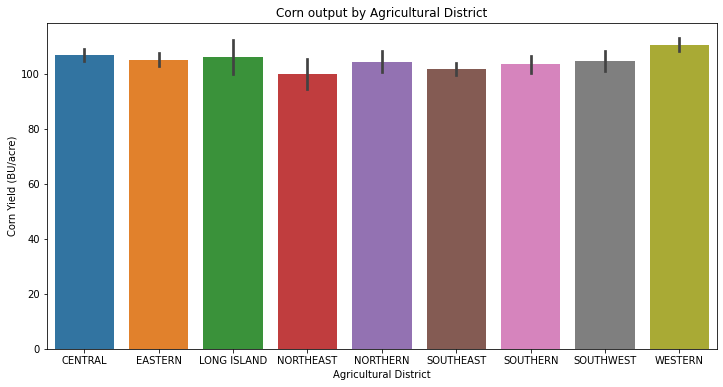

In [23]:

plt.figure(figsize=(12,6))
plt.title("Corn output by Agricultural District")

sns.barplot(x="Ag District", y="Value", data=yield_corn_df)

plt.xlabel('Agricultural District')
plt.ylabel('Corn Yield (BU/acre)');

Can see that amount of corn planted is varied by district, Western has planted the most

Text(0, 0.5, 'Corn acres planted')

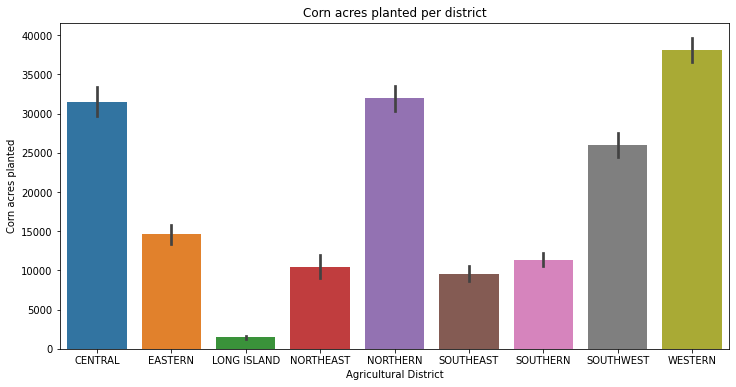

In [24]:
plt.figure(figsize=(12,6))
plt.title("Corn acres planted per district")

sns.barplot(x="Ag District", y="Value", data=acresplanted_corn)

plt.xlabel('Agricultural District')
plt.ylabel('Corn acres planted')

the amount of corn yield has increased over time


Text(0, 0.5, 'Corn Yield (BU/acre)')

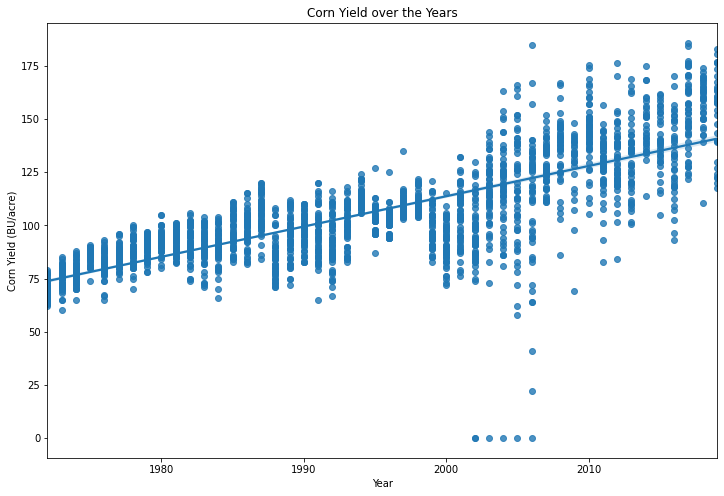

In [34]:
plt.figure(figsize=(12,8))
plt.title("Corn Yield over the Years")


sns.regplot(x="Year", y="Value", data=yield_corn_df)
plt.xlabel("Year")
plt.ylabel("Corn Yield (BU/acre)")

Amount of corn acres planted has been stagnant over the years

Text(0, 0.5, 'acres planted')

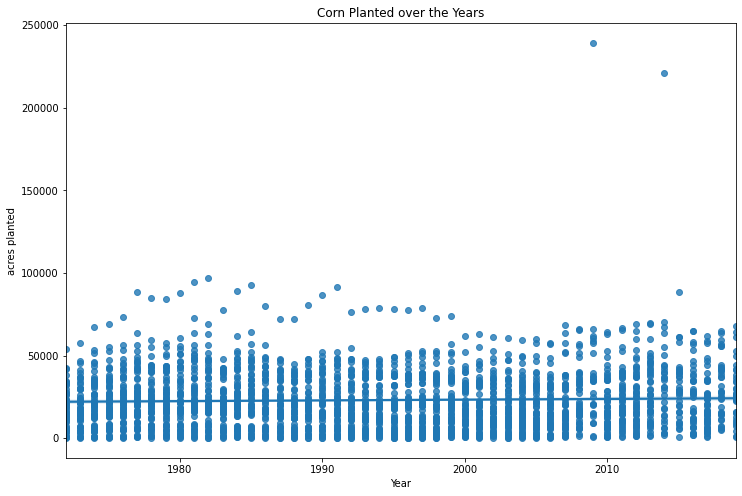

In [35]:
plt.figure(figsize=(12,8))
plt.title("Corn Planted over the Years")
sns.regplot(x="Year", y="Value", data=acresplanted_corn)
plt.ylabel("acres planted")

Some county stats


*   See that most counties have similar corn yield (few exceptions exist)




Text(0.5, 0, 'Yield')

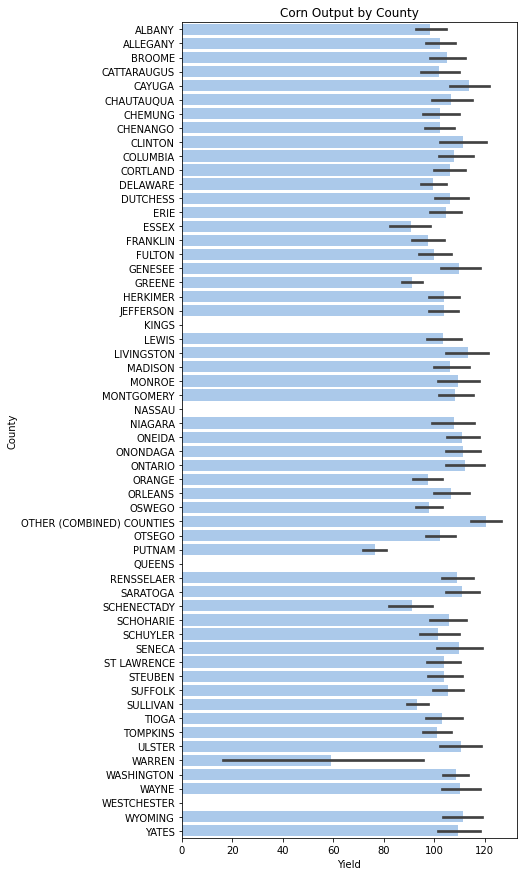

In [37]:
plt.subplots(figsize=(6, 15))
plt.title("Corn Output by County")
corn.sort_values("Value", ascending=True)
sns.set_color_codes("pastel")
sns.barplot(x="Value", y="County", data=yield_corn_df,
            label="Corn Output", color="b")
plt.xlabel("Yield")


Top 10 counties by corn production

In [42]:
top_counties = yield_corn_df.groupby("County").sum()
top_counties.Value.sort_values(ascending=False)[:10]


County
OTHER (COMBINED) COUNTIES    10628.0
CAYUGA                        5462.0
ONONDAGA                      5340.9
ONEIDA                        5328.4
WAYNE                         5294.4
ONTARIO                       5281.3
WYOMING                       5242.6
LIVINGSTON                    5211.3
GENESEE                       5172.2
RENSSELAER                    5133.0
Name: Value, dtype: float64

Of the top five counties which have the highest corn yield, here are the corresponding percentages - aside from other combined counties, most percentages are roughly equal. 




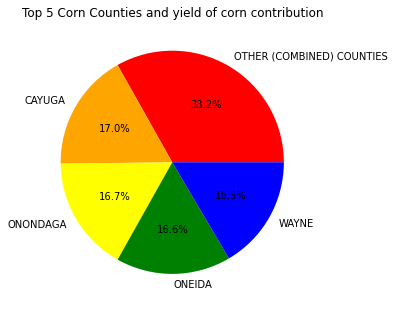

In [43]:
plt.figure(figsize=(5,6))
plt.title("Top 5 Corn Counties and yield of corn contribution")
labels = "OTHER (COMBINED) COUNTIES", "CAYUGA", "ONONDAGA", "ONEIDA", "WAYNE"
values = [10628.0, 5462.0, 5340.9,5328.4, 5294.4]
colors = "red", "orange", "yellow", "green", "blue", "purple"
plt.pie(values, labels=labels, colors=colors, autopct="%1.1f%%");

Acres planted, by County - slightly different than yield

In [44]:
top_counties = acresplanted_corn.groupby("County").sum()
top_counties.Value.sort_values(ascending=False)[:10]

County
CAYUGA                       3490800.0
LIVINGSTON                   2517200.0
ONTARIO                      2301900.0
WYOMING                      2295600.0
GENESEE                      2240100.0
OTHER (COMBINED) COUNTIES    2185500.0
ONONDAGA                     1925800.0
STEUBEN                      1920100.0
ONEIDA                       1827400.0
JEFFERSON                    1821300.0
Name: Value, dtype: float64

We see Wyoming and Genesee comes up in the top 5 counties for most corn acres planted, however fails to show up in most yield.

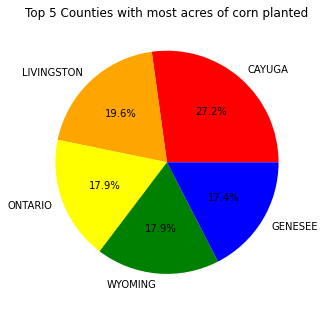

In [45]:
plt.figure(figsize=(5,6))
plt.title("Top 5 Counties with most acres of corn planted")
labels = "CAYUGA", "LIVINGSTON", "ONTARIO", "WYOMING", "GENESEE"
values = [3490800.0, 2517200.0, 2301900.0,2295600.0, 2240100.0]
colors = "red", "orange", "yellow", "green", "blue", "purple"
plt.pie(values, labels=labels, colors=colors, autopct="%1.1f%%");

Now recent years

In [47]:

recent = yield_corn_df[yield_corn_df["Year"]>=2015]
recent
recent_planted = acresplanted_corn[acresplanted_corn["Year"]>=2015]

In recent years, we see that Northeast is producing more than Western (what we saw before)



Text(0, 0.5, 'Acres planted')

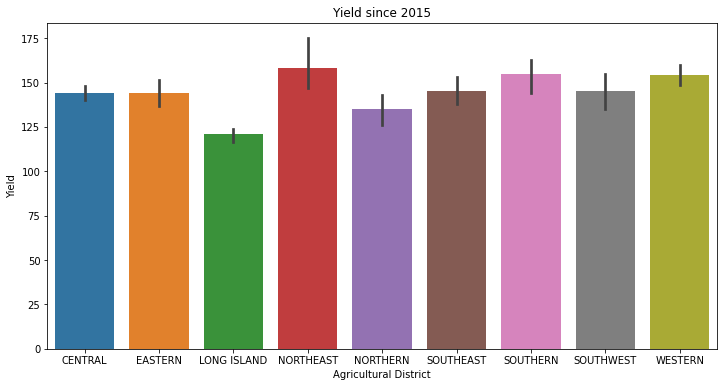

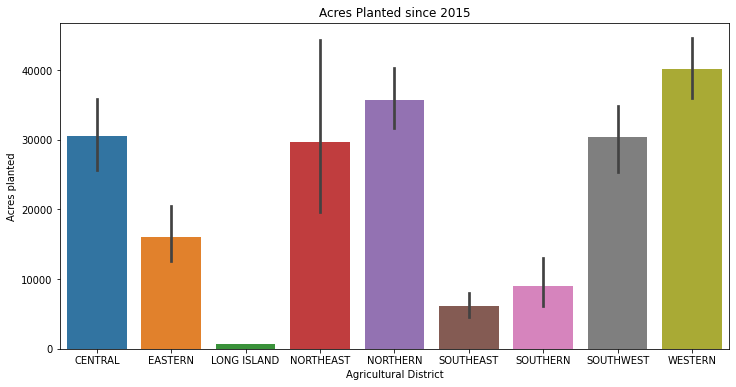

In [48]:
plt.figure(figsize=(12,6))
sns.barplot(x="Ag District", y="Value", data=recent)
plt.title("Yield since 2015")
plt.xlabel("Agricultural District")
plt.ylabel("Yield")

plt.figure(figsize=(12,6))
sns.barplot(x="Ag District", y="Value", data=recent_planted)
plt.title("Acres Planted since 2015")
plt.xlabel("Agricultural District")
plt.ylabel("Acres planted")

After taking a deeper look into recent years, it seems that output peaked in 2018. 

Text(0, 0.5, 'Yield')

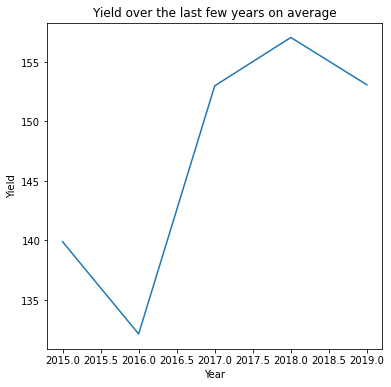

In [57]:
plt.figure(figsize=(6,6))
plt.title("Yield over the last few years on average")
yield_peryear = recent.groupby("Year")[["Value"]].mean().reset_index()
sns.lineplot(x="Year", y="Value", data=yield_peryear )
plt.ylabel("Yield")

Most planted in 2018; in sync with the higher yield output from above



Text(0, 0.5, 'acres planted')

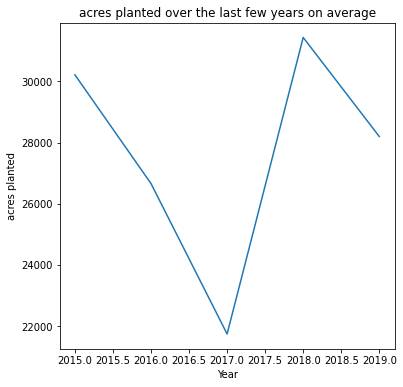

In [56]:
plt.figure(figsize=(6,6))
plt.title("acres planted over the last few years on average")
acres_peryear = recent_planted.groupby("Year")[["Value"]].mean().reset_index()
sns.lineplot(x="Year", y="Value", data=acres_peryear )
plt.ylabel("acres planted")